# Mobile_Usage_Impact_on_Visual_Search_Performance

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
# Loading Data
# Data Link: 
df = pd.read_csv(r'MASTER_PhonesmartdataAll_CCI_AdvStats.csv')

# Preprocess Data
df.columns

# Dropping unnecessary columns
df.drop(['Device', 'AutismQuotient', 'Year'],axis=1,inplace=True)

In [3]:
# Dropping missing values, rows
df.dropna(inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        548 non-null    object 
 1   GenderNum                  548 non-null    object 
 2   STAI                       548 non-null    object 
 3   BRIEF_Total                548 non-null    object 
 4   DailyAvgMins               548 non-null    object 
 5   DailyAvePickups            548 non-null    object 
 6   VS_RT_correct_Conjunction  548 non-null    float64
 7   VS_RT_correct_Single       548 non-null    float64
dtypes: float64(2), object(6)
memory usage: 34.4+ KB


,Age,GenderNum,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,,2,49,70,,,1178.700000,1216.387500
1,37,2,44,33,,,946.470000,785.597500
2,,1,,,,,1182.741667,950.900000
3,,1,,,,,1778.950000,984.333333
4,,2,,,,,521.500000,503.000000


In [4]:
#isolating necessary columns for frequency table
frequency_table = df.groupby('GenderNum')['DailyAvePickups'].value_counts().unstack(fill_value=0)
print(frequency_table)

DailyAvePickups       100  101  103  104  105  106  107  108  109  ...  89  \
GenderNum                                                          ...       
                   8    0    0    0    0    0    0    0    0    0  ...   0   
1                 96    0    0    0    1    1    0    1    0    0  ...   0   
2                309    1    2    1    2    2    3    0    1    1  ...   3   
3                  4    0    0    0    0    0    0    0    1    0  ...   0   

DailyAvePickups  90  91  92  93  95  96  97  98  99  
GenderNum                                            
                  0   0   0   0   0   0   0   0   0  
1                 1   0   1   0   1   0   2   1   0  
2                 2   2   0   1   0   2   0   1   2  
3                 0   0   0   0   0   0   0   0   0  

[4 rows x 86 columns]


['2' '1' ' ' '3']


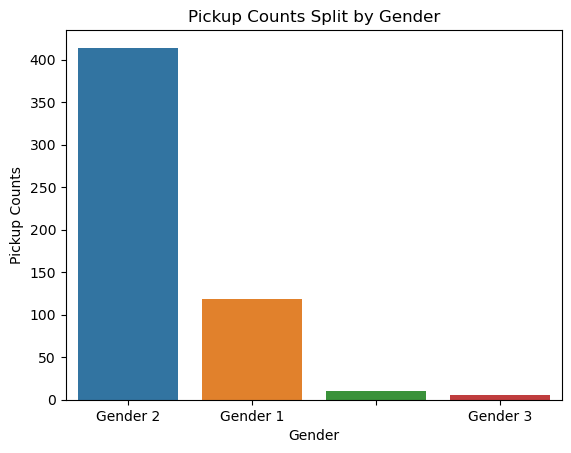

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['GenderNum'].unique())

# Plotting
sns.countplot(x='GenderNum', data=df)
plt.title('Pickup Counts Split by Gender')
plt.xlabel('Gender')
plt.ylabel('Pickup Counts')
plt.xticks([0, 1, 3, 2], ['Gender 2', 'Gender 1', 'Gender 3', ' '])
plt.show()

In [6]:
frequency_table = df['DailyAvgMins'].value_counts().sort_index()
print(frequency_table)

       183
0        3
104      2
108      1
109      3
      ... 
93       1
94       3
95       2
97       2
99       1
Name: DailyAvgMins, Length: 245, dtype: int64


In [7]:
df['DailyAvgMins'] = pd.to_numeric(df['DailyAvgMins'], errors='coerce')

print(df['DailyAvgMins'].isna().sum())

# Option 1: Filling nan values
df['DailyAvgMins'].fillna(value=0, inplace=True)

# Option 2: Dropping rows with nan values
df.dropna(subset=['DailyAvgMins'], inplace=True)

183


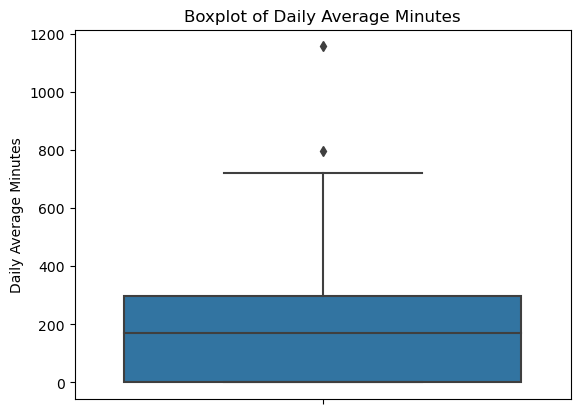

In [8]:
# Plotting a boxplot
sns.boxplot(y=df['DailyAvgMins'])
plt.title('Boxplot of Daily Average Minutes')
plt.ylabel('Daily Average Minutes')
plt.show()

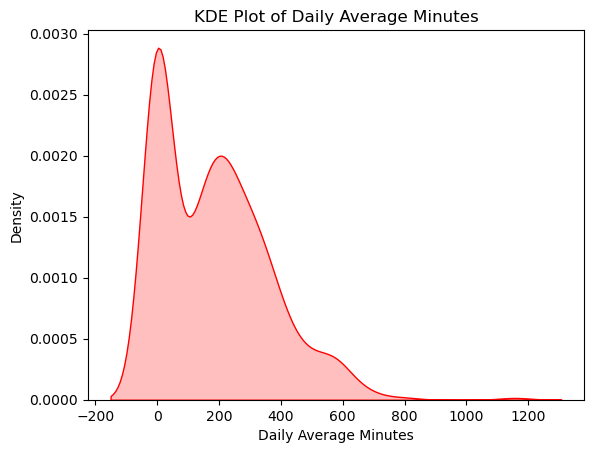

In [9]:
# Plotting a KDE plot
sns.kdeplot(df['DailyAvgMins'], fill=True, color="r")
plt.title('KDE Plot of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Density')
plt.show()

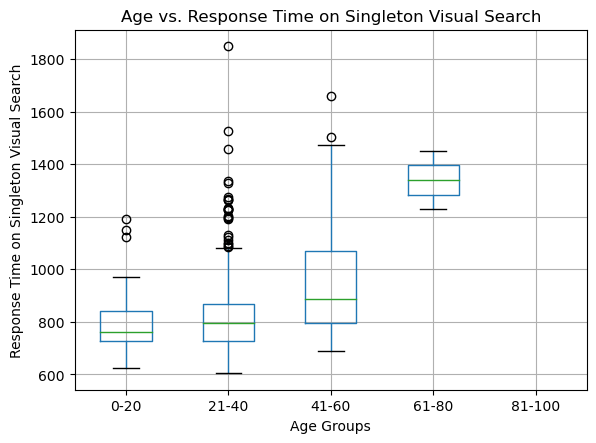

In [11]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Defining age bins, to make visaul clear. Without this step plot seems very complicated.
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=labels)

# Box plot
df.boxplot(column='VS_RT_correct_Single', by='AgeGroup')
plt.title('Age vs. Response Time on Singleton Visual Search')
plt.suptitle('')
plt.xlabel('Age Groups')
plt.ylabel('Response Time on Singleton Visual Search')
plt.show()

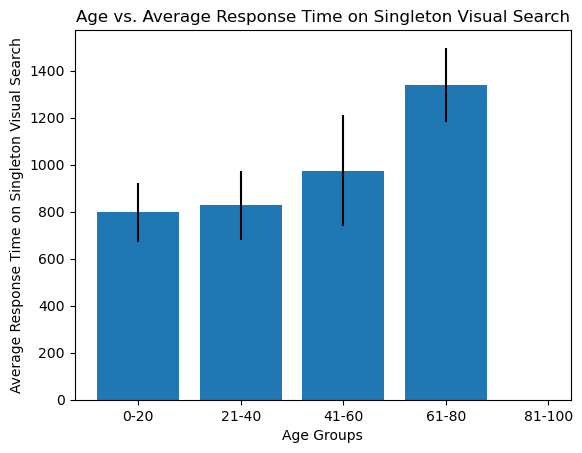

In [12]:
# Calculating mean and standard deviation for each group
grouped_data = df.groupby('AgeGroup')['VS_RT_correct_Single'].agg(['mean', 'std'])

# Plotting
plt.bar(grouped_data.index, grouped_data['mean'], yerr=grouped_data['std'])
plt.title('Age vs. Average Response Time on Singleton Visual Search')
plt.xlabel('Age Groups')
plt.ylabel('Average Response Time on Singleton Visual Search')
plt.show()

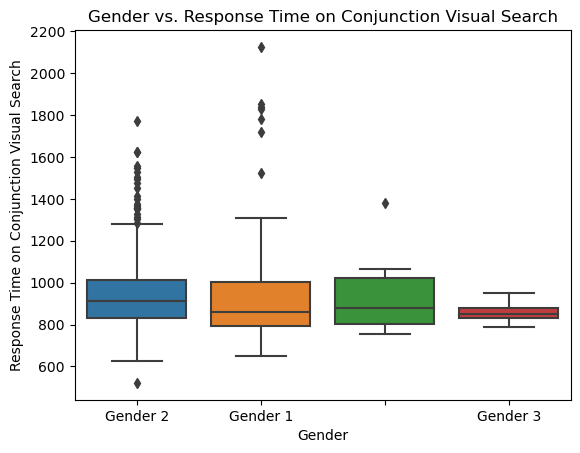

In [13]:
sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df)
plt.title('Gender vs. Response Time on Conjunction Visual Search')
plt.xlabel('Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.xticks([0, 1, 3, 2], ['Gender 2', 'Gender 1', 'Gender 3', ' '])
plt.show()

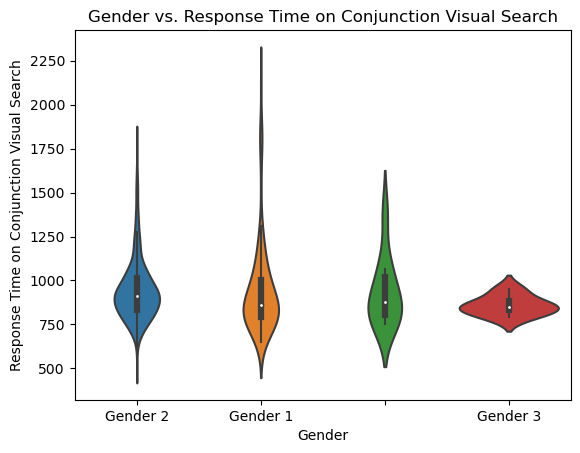

In [14]:
sns.violinplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df)
plt.title('Gender vs. Response Time on Conjunction Visual Search')
plt.xlabel('Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.xticks([0, 1, 3, 2], ['Gender 2', 'Gender 1', 'Gender 3', ' '])
plt.show()

In [15]:
selected_columns = df[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']]

correlation_matrix = selected_columns.corr(numeric_only=True)

print(correlation_matrix)

                           Age  DailyAvgMins  VS_RT_correct_Single
Age                   1.000000     -0.106924              0.319380
DailyAvgMins         -0.106924      1.000000             -0.120915
VS_RT_correct_Single  0.319380     -0.120915              1.000000


In [16]:
from sklearn.linear_model import LinearRegression

X = df[['DailyAvgMins']]  # Predictor
y = df['VS_RT_correct_Single']  # Response

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X, y)

# Getting the coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

predictions = model.predict(X)

df['Predicted_VS_RT_correct_Single'] = predictions

print(df[['DailyAvgMins', 'VS_RT_correct_Single', 'Predicted_VS_RT_correct_Single']].head())

Coefficient: -0.11729754664431698
Intercept: 862.7869000472125
   DailyAvgMins  VS_RT_correct_Single  Predicted_VS_RT_correct_Single
0           0.0           1216.387500                        862.7869
1           0.0            785.597500                        862.7869
2           0.0            950.900000                        862.7869
3           0.0            984.333333                        862.7869
4           0.0            503.000000                        862.7869


In [18]:
from sklearn.metrics import r2_score

# Converting all columns to numeric, coerce errors to nan again. Because I had errors.
for col in ['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups', 'DailyAvgMins']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling missing values, just in case
df.dropna(subset=['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups', 'DailyAvgMins'], inplace=True)

X = df[['Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups', 'DailyAvgMins']]  # Predictors
y = df['VS_RT_correct_Single']  # Response

# Creating and fit the model
model = LinearRegression()
model.fit(X, y)

# Getting coefficients, intercept, and R-squared
coefficients = model.coef_
intercept = model.intercept_
predictions = model.predict(X)
r_squared = r2_score(y, predictions)

# Results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r_squared)

# Coefficient for DailyAvgMins
daily_avg_mins_coef = coefficients[X.columns.get_loc('DailyAvgMins')]
print("Coefficient for DailyAvgMins:", daily_avg_mins_coef)

Coefficients: [ 6.99153170e+00  3.44973734e+01 -2.68643376e+00  9.67379337e-02
 -6.74177248e-01 -2.39970335e-02]
Intercept: 769.8844793406713
R-squared: 0.21878256442270494
Coefficient for DailyAvgMins: -0.02399703352755722


In [19]:
numeric_cols = ['Age', 'DailyAvgMins', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

# Creating Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 49, np.inf], labels=['<=30', '31-49', '>=50'])

# Creating Usage Groups
df['UsageGroup'] = pd.cut(df['DailyAvgMins'], bins=[0, 300, 899, np.inf], labels=['<=300', '301-899', '>=900'])

In [20]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# ANOVA
model = ols('VS_RT_correct_Single ~ C(AgeGroup) + C(UsageGroup)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

                  df        sum_sq        mean_sq          F        PR(>F)
C(AgeGroup)      2.0  7.872108e+05  393605.387567  16.944180  3.300112e-07
C(UsageGroup)    2.0  1.348942e+04    6744.710929   0.290351  7.485252e-01
Residual       120.0  2.787544e+06   23229.533608        NaN           NaN


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Converting group labels to string, because I got an error about the data type
df['AgeGroup'] = df['AgeGroup'].astype(str)
df['UsageGroup'] = df['UsageGroup'].astype(str)

# Post-hoc test for Age Groups
tukey_results_age = pairwise_tukeyhsd(endog=df['VS_RT_correct_Single'], groups=df['AgeGroup'], alpha=0.05)
print(tukey_results_age)

# Post-hoc test for Usage Groups
tukey_results_usage = pairwise_tukeyhsd(endog=df['VS_RT_correct_Single'], groups=df['UsageGroup'], alpha=0.05)
print(tukey_results_usage)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 31-49   <=30 -93.8872 0.0024 -158.8766 -28.8979   True
 31-49   >=50 462.3498 0.0001  205.7996 718.9001   True
  <=30   >=50 556.2371    0.0  301.5226 810.9515   True
-------------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1 group2 meandiff p-adj    lower    upper   reject
--------------------------------------------------------
301-899  <=300  17.8194 0.8364  -56.3463  91.9851  False
301-899    nan  27.2846 0.9487 -182.0643 236.6336  False
  <=300    nan   9.4652 0.9935 -196.8959 215.8263  False
--------------------------------------------------------


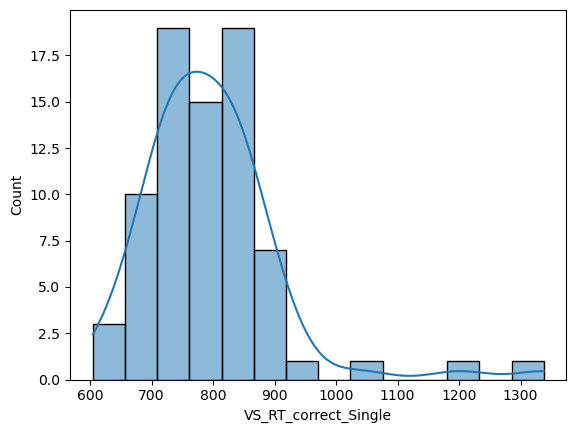

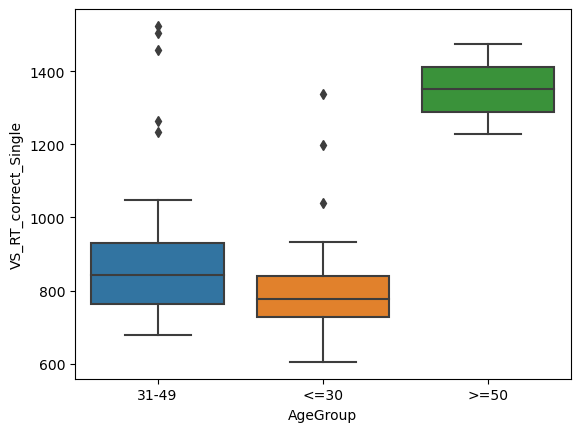

In [22]:
import scipy.stats as stats
import seaborn as sns

# Normality Check for each group
stats.shapiro(df['VS_RT_correct_Single'][df['AgeGroup'] == '<=30'])
sns.histplot(df['VS_RT_correct_Single'][df['AgeGroup'] == '<=30'], kde=True)
plt.show()

# Homogeneity of Variances Check
stats.levene(df['VS_RT_correct_Single'][df['AgeGroup'] == '<=30'],
             df['VS_RT_correct_Single'][df['AgeGroup'] == '31-49'],
             df['VS_RT_correct_Single'][df['AgeGroup'] == '>=50'])
sns.boxplot(x='AgeGroup', y='VS_RT_correct_Single', data=df)
plt.show()

Two-Way ANOVA Assumptions and Possible Outcomes

Assumptions:
Independence of Observations: Scores from one participant are independent of others.
Normality: Reaction times should be normally distributed across all brain training and mobile usage group combinations.
Homogeneity of Variances: Similar variances are expected among all group combinations.

Possible Outcomes:
Interaction Effect: A significant interaction between brain training and mobile usage implies the impact of brain training varies with mobile usage levels.
Main Effect of Brain Training: Significant differences in reaction times between trained and non-trained groups, irrespective of mobile usage.
Main Effect of Mobile Usage: Variation in reaction times across different usage groups, regardless of brain training status.
Tukey’s HSD Test Assumptions and Possible Outcomes

Assumptions:
Homoscedasticity: Equal variances across all group pairs.
Familywise Error Rate: Management of Type I error across all comparisons.
Possible Outcomes:

Tukey’s test will identify specific group pairs with significant mean differences, as indicated by a significant effect in the two-way ANOVA.

In [23]:
df.sort_values(by='VS_RT_correct_Single', ascending=False, inplace=True)

# Renaming columns
df.rename(columns={'VS_RT_correct_Conjunction': 'VS_RT_Before', 'VS_RT_correct_Single': 'VS_RT_After'}, inplace=True)

# Creating 'Brain Training' group
np.random.seed(0)  # For reproducibility
df['Brain_Training'] = np.random.choice(['Trained', 'Non-Trained'], size=len(df), replace=True)

# Creating Usage Groups
df['UsageGroup'] = pd.cut(df['DailyAvgMins'], bins=[0, 300, 899, np.inf], labels=['<=300', '301-899', '>=900'])

In [24]:
# Converting group labels to string, because I got an error about the data type
df['Brain_Training'] = df['Brain_Training'].astype(str)
df['UsageGroup'] = df['UsageGroup'].astype(str)

# Tukey's HSD for Brain Training Group
tukey_brain_training = pairwise_tukeyhsd(endog=df['VS_RT_After'], 
                                         groups=df['Brain_Training'], 
                                         alpha=0.05)
print("Tukey HSD test for Brain Training Group:")
print(tukey_brain_training)

# Tukey's HSD for Usage Group
tukey_usage_group = pairwise_tukeyhsd(endog=df['VS_RT_After'], 
                                      groups=df['UsageGroup'], 
                                      alpha=0.05)
print("\nTukey HSD test for Usage Group:")
print(tukey_usage_group)

Tukey HSD test for Brain Training Group:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
Non-Trained Trained -25.0339 0.4049 -84.3113 34.2435  False
-----------------------------------------------------------

Tukey HSD test for Usage Group:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1 group2 meandiff p-adj    lower    upper   reject
--------------------------------------------------------
301-899  <=300  17.8194 0.8364  -56.3463  91.9851  False
301-899    nan  27.2846 0.9487 -182.0643 236.6336  False
  <=300    nan   9.4652 0.9935 -196.8959 215.8263  False
--------------------------------------------------------


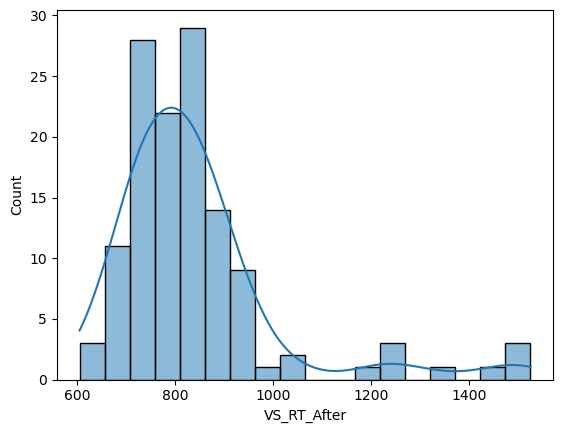

                                    df        sum_sq       mean_sq         F  \
C(Brain_Training)                  1.0  2.559669e+04  25596.685018  0.870837   
C(UsageGroup)                      1.0  1.239790e+04  12397.898915  0.421795   
C(Brain_Training):C(UsageGroup)    1.0  2.165869e+04  21658.687206  0.736861   
Residual                         120.0  3.527183e+06  29393.190265       NaN   

                                   PR(>F)  
C(Brain_Training)                0.352597  
C(UsageGroup)                    0.517284  
C(Brain_Training):C(UsageGroup)  0.392380  
Residual                              NaN  


In [25]:
# Check for normality (example)
sns.histplot(df['VS_RT_After'], kde=True)
plt.show()

# Check for homogeneity of variances
stats.levene(df['VS_RT_After'][df['Brain_Training'] == 'Trained'],
             df['VS_RT_After'][df['Brain_Training'] == 'Non-Trained'])

# Two-Way ANOVA
model = ols('VS_RT_After ~ C(Brain_Training) * C(UsageGroup)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)